<a href="https://colab.research.google.com/github/Melkateb/Face-Recognition/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Download the dataset and understand the format**

In [ ]:
!unzip archive.zip


Archive:  archive.zip
replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


**2. Generate the Data Matrix and the Label vector**

In [ ]:
from PIL import Image
import os.path
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from keras.preprocessing.image import img_to_array

data_set = []
Y =[]

for id in range(1,41):
    for count in range(1,11) :
      image = Image.open('s'+str(id)+'/'+str(count)+'.pgm')         #read image from file
      image_arr = img_to_array(image)                               #convert image to array
      image_arr = np.resize(image_arr,(10304))                      #resize images to 92x112
      data_set.append(image_arr)                                    #add image array to data list
      Y.append(id)                                                  #add id from 1 to 10 for each person's images in label list Y

D = np.arange(400*10304).reshape(400,10304)                         #stack the 400 vector in single matrix D

for i in range(0,400):
    D[i] = np.array(data_set[i])  

**3. Split the Dataset into Training and Test sets**

In [ ]:
train_set = np.arange(200*10304).reshape(200,10304)                    #create training set of size 200x10304
test_set = np.arange(200*10304).reshape(200,10304)                     #create testing set of size 200x10304
train_label = []                                                       #create list for training labels
test_label = []                                                        #create list for testing labels

j,k = 0,0
for i in range(0,400):              
    if(i%2 == 0):                                                      #add even for test set
        test_set[j] = D[i]
        test_label.append(Y[i])
        j += 1
    else:                                                              #add odd for train set
        train_set[k] = D[i]
        train_label.append(Y[i])
        k += 1

**4. Classification using PCA.**

In [ ]:
import numpy as np
import scipy.linalg as la

data_M = np.mean(data_set,axis=0)                                     #compute mean of the data set
train_M = np.mean(train_set,axis=0)                                   #compute mean of the trainig set

data_Z = data_set-data_M                                              #center the data set
train_Z = train_set-train_M                                           #center the training set       

cov = 1/400*np.dot(data_Z.T,data_Z)                                   #compute covariance matrix

eigenvalue,eigenvector = la.eig(cov)                                  #compute eigenvalues and eigenvectors

index = eigenvalue.argsort()[::-1]                                    #sort the indecies of the ascending eigenvalues
                                                                      # and get the index of the largest one

eigenvalue = eigenvalue[index]                                        #crop eigenvalues 
eigenvector = eigenvector[:,index]                                    #crop eigenvectors

def chooseDimensionality(eigenvalue,alpha):                           #function to choose the dimensionality
    data_variance = np.sum(eigenvalue.real)                           #compute data set variance
    variance_ratio, num_dimensions, eigValSum = 0,0,0     
    while(variance_ratio < alpha):
        eigValSum += eigenvalue[num_dimensions]
        variance_ratio = eigValSum/data_variance
        num_dimensions += 1
    return num_dimensions


alpha = 0.8
44
alpha = 0.85
68
alpha = 0.9
111
alpha = 0.95
190


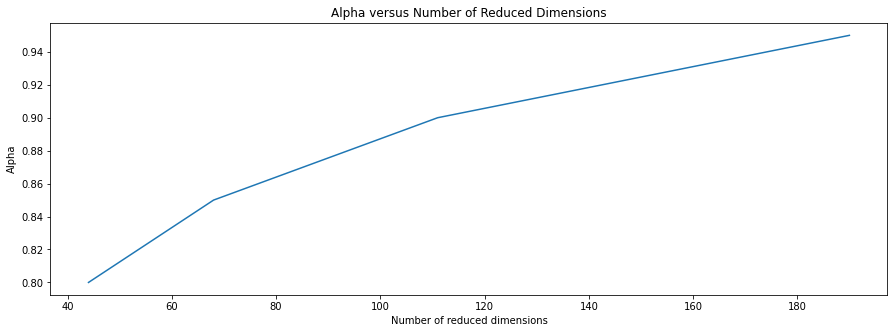

In [ ]:
alpha = np.array([0.8,0.85,0.9,0.95])                                 #define alpha
dim_alpha = np.empty(4,dtype=object)
projection_matrices = []                                              #create list for projection matrices 

for i in range(len(alpha)):
    dim_alpha[i] = chooseDimensionality(eigenvalue,alpha[i])
    print("alpha =",alpha[i])
    print(dim_alpha[i])
    
plt.plot(dim_alpha, alpha)                                            #plot the number of dimensions vs each alpha        
plt.title('Alpha versus Number of Reduced Dimensions')
plt.gcf().set_size_inches(15,5)
plt.xlabel('Number of reduced dimensions')
plt.ylabel('Alpha')
plt.show()

for i in range(0,4):
  projection_matrices.append(eigenvector[:,0:dim_alpha[i]])


In [ ]:
reduced_dim_train = []                                             #project training set  
for i in range(0,4): 
   reduced_dim_train.append((projection_matrices[i].T @ train_Z.T))


In [ ]:
test_M = np.mean(test_set,axis=0)                                 #compute mean of the testing set

test_Z = test_set-test_M                                          #center the testing set  

In [ ]:
reduced_dim_test = []                                             #project testing set 
for i in range(0,4):
   reduced_dim_test.append(projection_matrices[i].T @ test_Z.T)


**5. Classifier Tuning**

accuracy at knn  1  =  0.945
accuracy at knn  1  =  0.945
accuracy at knn  1  =  0.95
accuracy at knn  1  =  0.945
accuracy at knn  2  =  0.87
accuracy at knn  2  =  0.87
accuracy at knn  2  =  0.85
accuracy at knn  2  =  0.85
accuracy at knn  3  =  0.84
accuracy at knn  3  =  0.825
accuracy at knn  3  =  0.835
accuracy at knn  3  =  0.82
accuracy at knn  4  =  0.78
accuracy at knn  4  =  0.765
accuracy at knn  4  =  0.76
accuracy at knn  4  =  0.75


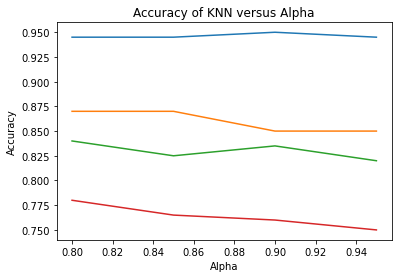

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

def knn(trainingSet,trainingLabel,testSet,testLabel,k):           #function to compute KNN
    knn = KNeighborsClassifier(k)
    knn.fit(trainingSet,trainingLabel)
    pred = knn.predict(testSet)
    accuracy = metrics.accuracy_score(testLabel, pred)
    return accuracy

knn_accuracy = [] 
num_neighbors = np.array([1,3,5,7])


for n in range (0,4):                                             #call function Knn for each number of neighbours four times for each alpha
   for i in range(0,4):
      knn_accuracy.append(knn(reduced_dim_train[i].real.T,train_label,reduced_dim_test[i].real.T,test_label,num_neighbors[n]))
      print("accuracy at knn ",n+1," = ",knn_accuracy[i])
   plt.plot(alpha,knn_accuracy)
   knn_accuracy = []


plt.title('Accuracy of KNN versus Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()



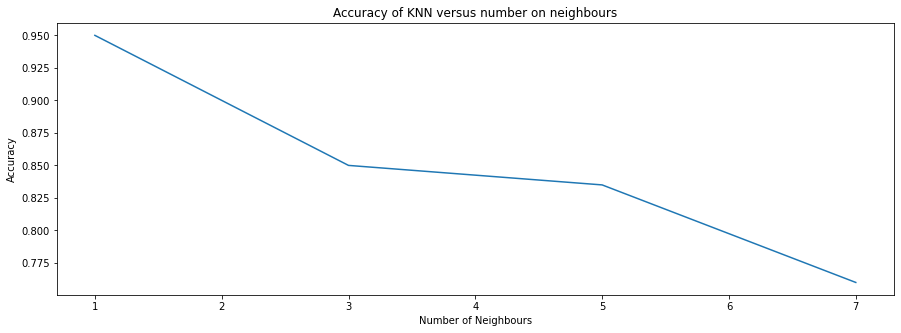

In [ ]:
alpha = 0.9
score = []
for i in range (0,4):
    score.append(knn(reduced_dim_train[2].real.T,train_label,reduced_dim_test[2].real.T,test_label,num_neighbors[i]))
plt.plot (num_neighbors,score)    
plt.title('Accuracy of KNN versus number on neighbours')
plt.gcf().set_size_inches(15,5)
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()